In [48]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [3]:
path = 'D:\Documentos\MAC\Semestres\Octavo\Mineria de datos\Practicas\Practica1\csv\Domestic Violence in Spain 2003-2017.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,Month,Year,AutonomousCommunity,Province,Relation,VictimAge,AgressorAge,PreviousAbuseReport,LivingTogether,Victims
0,January,2003,Andalucía,Almería,Partner,41-50 years,51-64 years,Unknown,Yes,1
1,January,2003,Andalucía,Granada,Partner,75-84 years,75-84 years,Unknown,Yes,1
2,January,2003,Andalucía,Málaga,Partner,21-30 years,Unknown,Unknown,Yes,1
3,January,2003,Canarias,Santa Cruz de Tenerife,Partner,31-40 years,Unknown,Unknown,Yes,1
4,January,2003,Cataluña,Barcelona,Ex-partner,31-40 years,Unknown,Unknown,No,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
Month                  900 non-null object
Year                   900 non-null int64
AutonomousCommunity    900 non-null object
Province               900 non-null object
Relation               900 non-null object
VictimAge              900 non-null object
AgressorAge            900 non-null object
PreviousAbuseReport    900 non-null object
LivingTogether         900 non-null object
Victims                900 non-null int64
dtypes: int64(2), object(8)
memory usage: 70.4+ KB


In [5]:
df.shape

(900, 10)

In [6]:
#FILAS
df.shape[0]

900

In [7]:
#COLUMNAS
df.shape[1]

10

In [8]:
df.columns.values.tolist()

['Month',
 'Year',
 'AutonomousCommunity',
 'Province',
 'Relation',
 'VictimAge',
 'AgressorAge',
 'PreviousAbuseReport',
 'LivingTogether',
 'Victims']

In [9]:
df.dtypes

Month                  object
Year                    int64
AutonomousCommunity    object
Province               object
Relation               object
VictimAge              object
AgressorAge            object
PreviousAbuseReport    object
LivingTogether         object
Victims                 int64
dtype: object

In [10]:
df.isnull().any().any()

False

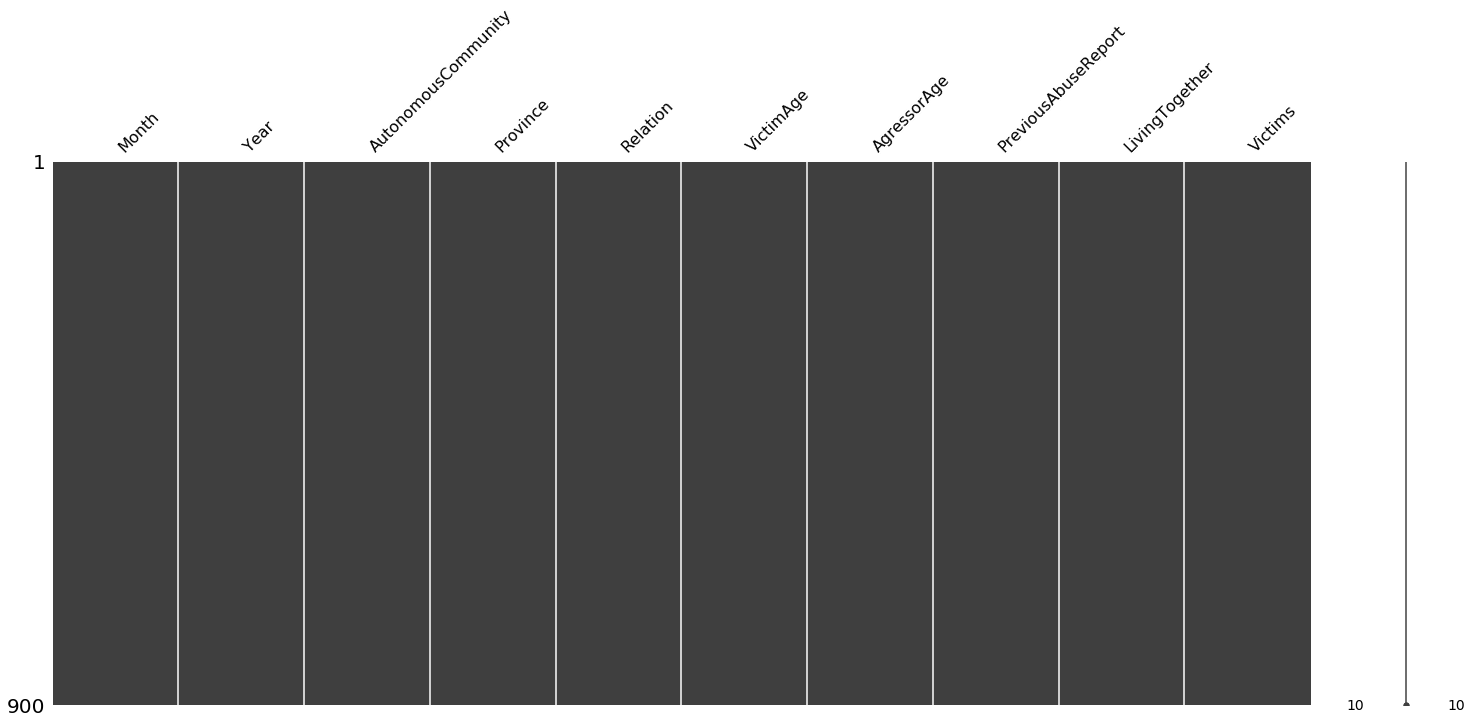

In [11]:
msno.matrix(df)

In [12]:
df.replace({'Unknown': np.nan}, inplace=True)

In [13]:
df.isnull().any().any()

True

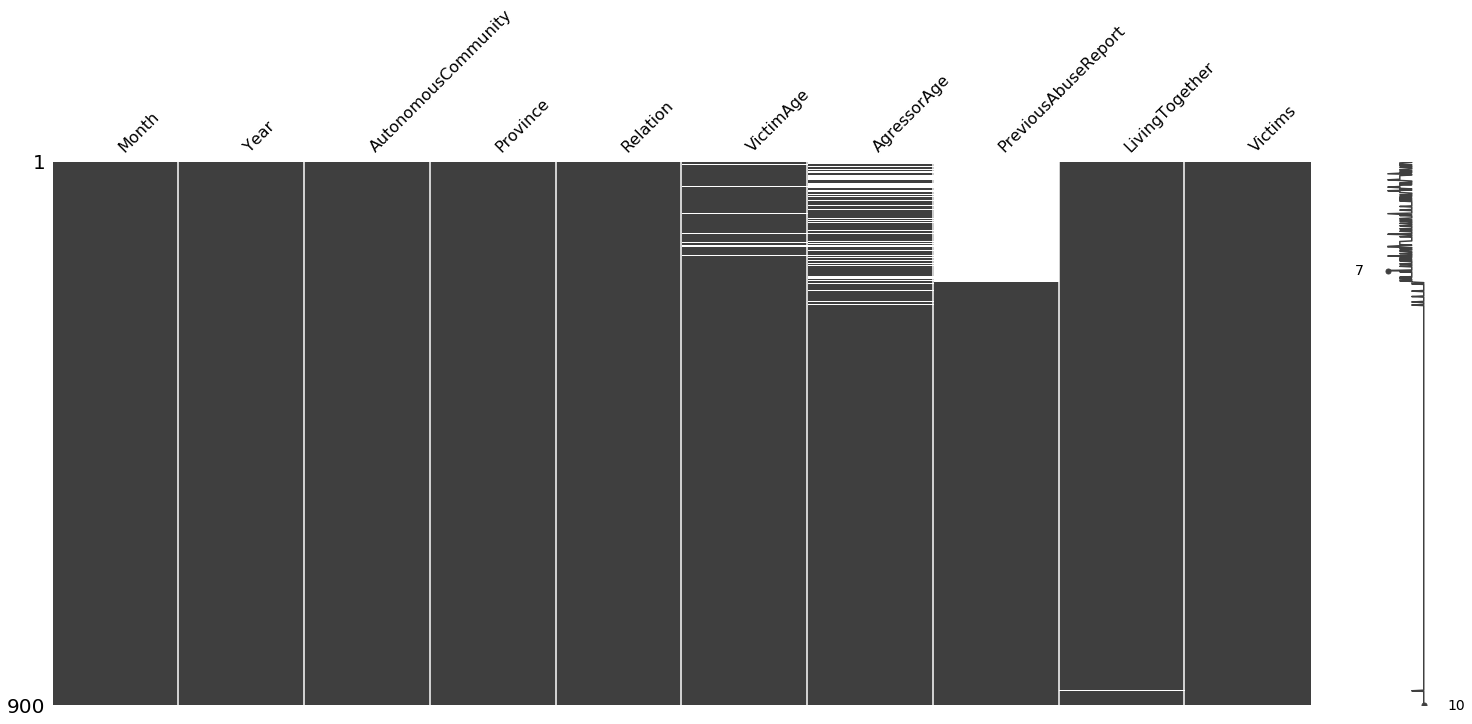

In [14]:
msno.matrix(df)

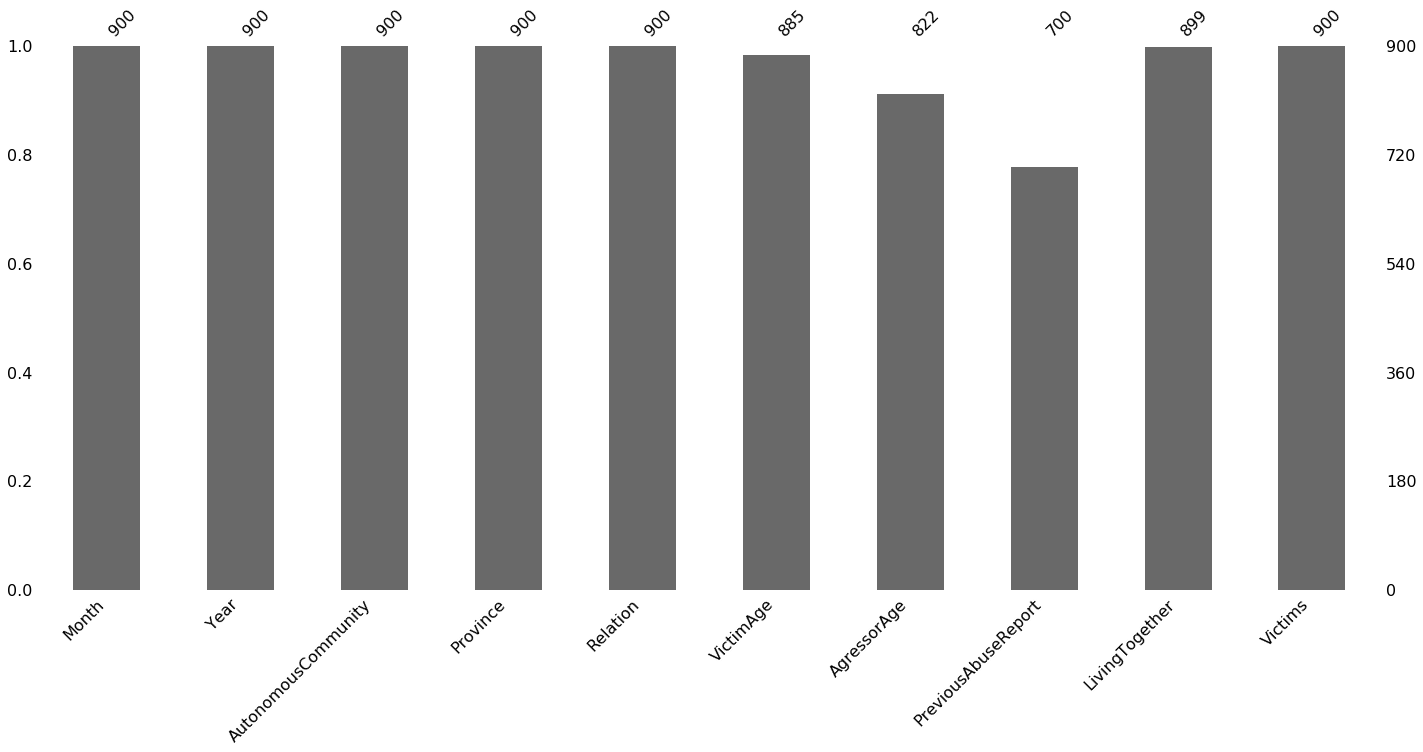

In [15]:
msno.bar(df)

In [16]:
df.columns[df.isnull().any()].tolist()

['VictimAge', 'AgressorAge', 'PreviousAbuseReport', 'LivingTogether']

In [17]:
df.describe()

,Year,Victims
count,900.000000,900.000000
mean,2009.342222,1.001111
std,4.139744,0.033333
min,2003.000000,1.000000
25%,2006.000000,1.000000
50%,2009.000000,1.000000
75%,2013.000000,1.000000
max,2017.000000,2.000000


In [18]:
df.loc[[0]]

,Month,Year,AutonomousCommunity,Province,Relation,VictimAge,AgressorAge,PreviousAbuseReport,LivingTogether,Victims
0,January,2003,Andalucía,Almería,Partner,41-50 years,51-64 years,NaN,Yes,1


In [19]:
df.loc[10:15]

,Month,Year,AutonomousCommunity,Province,Relation,VictimAge,AgressorAge,PreviousAbuseReport,LivingTogether,Victims
10,February,2003,Galicia,A Coruña,Partner,65-74 years,65-74 years,NaN,Yes,1
11,February,2003,La Rioja,La Rioja,Ex-partner,21-30 years,31-40 years,NaN,No,1
12,March,2003,Andalucía,Cádiz,Partner,31-40 years,51-64 years,NaN,Yes,1
13,March,2003,Andalucía,Jaén,Ex-partner,21-30 years,NaN,NaN,No,1
14,March,2003,Andalucía,Jaén,Ex-partner,31-40 years,NaN,NaN,No,1
15,March,2003,Galicia,A Coruña,Partner,41-50 years,41-50 years,NaN,Yes,1


In [20]:
df.drop([0,24,51], axis=0).head()

,Month,Year,AutonomousCommunity,Province,Relation,VictimAge,AgressorAge,PreviousAbuseReport,LivingTogether,Victims
1,January,2003,Andalucía,Granada,Partner,75-84 years,75-84 years,NaN,Yes,1
2,January,2003,Andalucía,Málaga,Partner,21-30 years,NaN,NaN,Yes,1
3,January,2003,Canarias,Santa Cruz de Tenerife,Partner,31-40 years,NaN,NaN,Yes,1
4,January,2003,Cataluña,Barcelona,Ex-partner,31-40 years,NaN,NaN,No,1
5,January,2003,Cataluña,Barcelona,Partner,31-40 years,51-64 years,NaN,Yes,1


In [21]:
df.drop(df.index[1:5], axis=0).head(10)

,Month,Year,AutonomousCommunity,Province,Relation,VictimAge,AgressorAge,PreviousAbuseReport,LivingTogether,Victims
0,January,2003,Andalucía,Almería,Partner,41-50 years,51-64 years,NaN,Yes,1
5,January,2003,Cataluña,Barcelona,Partner,31-40 years,51-64 years,NaN,Yes,1
6,January,2003,Cataluña,Barcelona,Partner,NaN,31-40 years,NaN,Yes,1
7,January,2003,La Rioja,La Rioja,Partner,31-40 years,31-40 years,NaN,Yes,1
8,February,2003,Andalucía,Málaga,Partner,75-84 years,65-74 years,NaN,Yes,1
9,February,2003,Cataluña,Tarragona,Partner,21-30 years,NaN,NaN,Yes,1
10,February,2003,Galicia,A Coruña,Partner,65-74 years,65-74 years,NaN,Yes,1
11,February,2003,La Rioja,La Rioja,Ex-partner,21-30 years,31-40 years,NaN,No,1
12,March,2003,Andalucía,Cádiz,Partner,31-40 years,51-64 years,NaN,Yes,1
13,March,2003,Andalucía,Jaén,Ex-partner,21-30 years,NaN,NaN,No,1


In [22]:
df[100:].head() #df.tail(-100) )

,Month,Year,AutonomousCommunity,Province,Relation,VictimAge,AgressorAge,PreviousAbuseReport,LivingTogether,Victims
100,June,2004,Comunidad Valenciana,Valencia,Ex-partner,18-20 years,21-30 years,NaN,No,1
101,June,2004,Comunidad Valenciana,Valencia,Partner,65-74 years,65-74 years,NaN,Yes,1
102,June,2004,Comunidad Valenciana,Valencia,Partner,65-74 years,NaN,NaN,Yes,1
103,June,2004,Comunidad Foral de Navarra,Navarra,Ex-partner,51-64 years,65-74 years,NaN,No,1
104,July,2004,Andalucía,Almería,Ex-partner,31-40 years,41-50 years,NaN,No,1


In [23]:
df.VictimAge.values

array(['41-50 years', '75-84 years', '21-30 years', '31-40 years',
       '31-40 years', '31-40 years', nan, '31-40 years', '75-84 years',
       '21-30 years', '65-74 years', '21-30 years', '31-40 years',
       '21-30 years', '31-40 years', '41-50 years', '65-74 years',
       '21-30 years', '21-30 years', '41-50 years', nan, '31-40 years',
       '31-40 years', '21-30 years', '41-50 years', '31-40 years',
       '41-50 years', '21-30 years', '31-40 years', '31-40 years', nan,
       '41-50 years', '51-64 years', '65-74 years', '31-40 years',
       '31-40 years', '31-40 years', '41-50 years', '31-40 years',
       '21-30 years', '31-40 years', nan, nan, '31-40 years',
       '41-50 years', '51-64 years', '51-64 years', '31-40 years', nan,
       '65-74 years', '31-40 years', '18-20 years', '41-50 years',
       '>85 years', '41-50 years', '21-30 years', '21-30 years',
       '31-40 years', '21-30 years', '21-30 years', '41-50 years',
       '31-40 years', '31-40 years', '31-40 years

In [24]:
df.VictimAge.unique()

array(['41-50 years', '75-84 years', '21-30 years', '31-40 years', nan,
       '65-74 years', '51-64 years', '18-20 years', '>85 years',
       '<16 years', '16-17 years'], dtype=object)

In [25]:
df.VictimAge.value_counts()

31-40 years    249
41-50 years    190
21-30 years    184
51-64 years    108
65-74 years     65
75-84 years     46
18-20 years     30
<16 years        5
16-17 years      4
>85 years        4
Name: VictimAge, dtype: int64

In [26]:
df.agg(['count', 'size', 'nunique'])

,Month,Year,AutonomousCommunity,Province,Relation,VictimAge,AgressorAge,PreviousAbuseReport,LivingTogether,Victims
count,900,900,900,900,900,885,822,700,899,900
size,900,900,900,900,900,900,900,900,900,900
nunique,12,15,21,57,3,10,9,3,2,2


In [27]:
df.groupby('AutonomousCommunity').agg(['count', 'size', 'nunique']).stack()

Month  Year  Province  Relation  VictimAge  \
AutonomousCommunity                                                          
Andalucía              count      178   178       178       178        178   
                       size       178   178       178       178        178   
                       nunique     12    15         8         3          9   
Aragón                 count       23    23        23        23         23   
                       size        23    23        23        23         23   
...                               ...   ...       ...       ...        ...   
Principado de Asturias size        23    23        23        23         23   
                       nunique     11    11         1         2          6   
Región de Murcia       count       25    25        25        25         24   
                       size        25    25        25        25         25   
                       nunique     10    11         1         2          6   

                                AgressorAge  PreviousAbuseReport  \
AutonomousCommunity                                                
Andalucía              count            163                  137   
                       size             178                  178   
                       nunique            8                    2   
Aragón                 count             18                   15   
                       size              23                   23   
...                                     ...                  ...   
Principado de Asturias size              23                   23   
                       nunique            6                    2   
Región de Murcia       count             19                   16   
                       size              25                   25   
                       nunique            7                    2   

                                LivingTogether  Victims  
AutonomousCommunity                                      
Andalucía              count               178      178  
                       size                178      178  
                       nunique               2        1  
Aragón                 count                23       23  
                       size                 23       23  
...                                        ...      ...  
Principado de Asturias size                 23       23  
                       nunique               2        1  
Región de Murcia       count                25       25  
                       size                 25       25  
                       nunique               2        1  

[63 rows x 9 columns]

In [28]:
df.groupby('AutonomousCommunity').agg(['count', 'size', 'nunique'])

Month               Year              Province  \
                           count size nunique count size nunique    count   
AutonomousCommunity                                                         
Andalucía                    178  178      12   178  178      15      178   
Aragón                        23   23      10    23   23      12       23   
Canarias                      56   56      12    56   56      15       56   
Cantabria                      7    7       6     7    7       5        7   
Castilla - La Mancha          41   41      12    41   41      14       41   
Castilla y León               46   46      12    46   46      14       46   
Cataluña                     139  139      12   139  139      15      139   
Ceuta                          2    2       2     2    2       2        2   
Comunidad Foral de Navarra    10   10       6    10   10       7       10   
Comunidad Valenciana         107  107      12   107  107      13      107   
Comunidad de Madrid           95   95      12    95   95      15       95   
Comunitat Valenciana           9    9       6     9    9       2        9   
Extremadura                   11   11       8    11   11      10       11   
Galicia                       53   53      12    53   53      14       53   
Illes Balears                  6    6       6     6    6       1        6   
Islas Baleares                27   27       9    27   27      13       27   
La Rioja                       6    6       6     6    6       4        6   
Melilla                        5    5       3     5    5       4        5   
País Vasco                    31   31      12    31   31      13       31   
Principado de Asturias        23   23      11    23   23      11       23   
Región de Murcia              25   25      10    25   25      11       25   

                                        Relation  ... AgressorAge  \
                           size nunique    count  ...     nunique   
AutonomousCommunity                               ...               
Andalucía                   178       8      178  ...           8   
Aragón                       23       3       23  ...           5   
Canarias                     56       2       56  ...           7   
Cantabria                     7       1        7  ...           3   
Castilla - La Mancha         41       5       41  ...           6   
Castilla y León              46       9       46  ...           7   
Cataluña                    139       4      139  ...           8   
Ceuta                         2       1        2  ...           1   
Comunidad Foral de Navarra   10       1       10  ...           6   
Comunidad Valenciana        107       3      107  ...           7   
Comunidad de Madrid          95       1       95  ...           8   
Comunitat Valenciana          9       3        9  ...           5   
Extremadura                  11       2       11  ...           6   
Galicia                      53       4       53  ...           6   
Illes Balears                 6       1        6  ...           4   
Islas Baleares               27       1       27  ...           6   
La Rioja                      6       1        6  ...           3   
Melilla                       5       1        5  ...           3   
País Vasco                   31       4       31  ...           7   
Principado de Asturias       23       1       23  ...           6   
Región de Murcia             25       1       25  ...           7   

                           PreviousAbuseReport              LivingTogether  \
                                         count size nunique          count   
AutonomousCommunity                                                          
Andalucía                                  137  178       2            178   
Aragón                                      15   23       2             23   
Canarias                                    42   56       3             56   
Cantabria                                    4    7  

In [29]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,Month,Year,AutonomousCommunity,Province,Relation,VictimAge,AgressorAge,PreviousAbuseReport,LivingTogether,Victims
860,October,2016,Comunitat Valenciana,Alicante/Alacant,Partner,75-84 years,75-84 years,No,Yes,1
880,February,2017,Comunitat Valenciana,Alicante/Alacant,Partner,75-84 years,>85 years,No,Yes,1
874,January,2017,Comunidad Foral de Navarra,Navarra,Partner,41-50 years,41-50 years,No,Yes,1
780,June,2015,Andalucía,Sevilla,Partner,41-50 years,51-64 years,Yes,Yes,1
525,October,2010,Andalucía,Granada,Partner,31-40 years,51-64 years,No,Yes,1


In [30]:
df.shape

(900, 10)

In [31]:
df_sample.shape

(45, 10)

In [32]:
df_dropped = df.dropna(subset=['Relation'])
df_dropped.head()

,Month,Year,AutonomousCommunity,Province,Relation,VictimAge,AgressorAge,PreviousAbuseReport,LivingTogether,Victims
0,January,2003,Andalucía,Almería,Partner,41-50 years,51-64 years,NaN,Yes,1
1,January,2003,Andalucía,Granada,Partner,75-84 years,75-84 years,NaN,Yes,1
2,January,2003,Andalucía,Málaga,Partner,21-30 years,NaN,NaN,Yes,1
3,January,2003,Canarias,Santa Cruz de Tenerife,Partner,31-40 years,NaN,NaN,Yes,1
4,January,2003,Cataluña,Barcelona,Ex-partner,31-40 years,NaN,NaN,No,1


In [33]:
df_dropped.shape

(900, 10)

In [34]:
df_copy = df.copy()
df_copy.head()

,Month,Year,AutonomousCommunity,Province,Relation,VictimAge,AgressorAge,PreviousAbuseReport,LivingTogether,Victims
0,January,2003,Andalucía,Almería,Partner,41-50 years,51-64 years,NaN,Yes,1
1,January,2003,Andalucía,Granada,Partner,75-84 years,75-84 years,NaN,Yes,1
2,January,2003,Andalucía,Málaga,Partner,21-30 years,NaN,NaN,Yes,1
3,January,2003,Canarias,Santa Cruz de Tenerife,Partner,31-40 years,NaN,NaN,Yes,1
4,January,2003,Cataluña,Barcelona,Ex-partner,31-40 years,NaN,NaN,No,1


In [35]:
df_copy.shape

(900, 10)

In [36]:
df_dropped['Year'].dtype

dtype('int64')

In [37]:
df_copy['Year'].fillna(value=np.round(df['Year'].mean(),decimals=0), inplace=True)

In [38]:
df_copy.agg(['count', 'size', 'nunique'])

,Month,Year,AutonomousCommunity,Province,Relation,VictimAge,AgressorAge,PreviousAbuseReport,LivingTogether,Victims
count,900,900,900,900,900,885,822,700,899,900
size,900,900,900,900,900,900,900,900,900,900
nunique,12,15,21,57,3,10,9,3,2,2


In [39]:
list(df['AutonomousCommunity'].unique())

['Andalucía',
 'Canarias',
 'Cataluña',
 'La Rioja',
 'Galicia',
 'Comunidad de Madrid',
 'Región de Murcia',
 'Comunidad Valenciana',
 'Comunidad Foral de Navarra',
 'Aragón',
 'Castilla - La Mancha',
 'Principado de Asturias',
 'Castilla y León',
 'Ceuta',
 'Islas Baleares',
 'Cantabria',
 'Extremadura',
 'País Vasco',
 'Melilla',
 'Illes Balears',
 'Comunitat Valenciana']

In [40]:
keys = list(df['AutonomousCommunity'].unique())
vals = range(1,8)
act = dict(zip(keys, vals))
act

{'Andalucía': 1,
 'Canarias': 2,
 'Cataluña': 3,
 'La Rioja': 4,
 'Galicia': 5,
 'Comunidad de Madrid': 6,
 'Región de Murcia': 7}

In [42]:
df_copy.groupby(["Victims", "VictimAge", "Relation", "AgressorAge"]).count()

Month  Year  AutonomousCommunity  \
Victims VictimAge   Relation   AgressorAge                                     
1       16-17 years Ex-partner 18-20 years      1     1                    1   
                    Partner    21-30 years      2     2                    2   
                               31-40 years      1     1                    1   
        18-20 years Ex-partner 18-20 years      1     1                    1   
                               21-30 years      7     7                    7   
...                                           ...   ...                  ...   
        <16 years   Ex-partner 31-40 years      1     1                    1   
                    Partner    18-20 years      2     2                    2   
                               31-40 years      1     1                    1   
        >85 years   Partner    >85 years        4     4                    4   
2       31-40 years Partner    31-40 years      1     1                    1   

                                            Province  PreviousAbuseReport  \
Victims VictimAge   Relation   AgressorAge                                  
1       16-17 years Ex-partner 18-20 years         1                    1   
                    Partner    21-30 years         2                    2   
                               31-40 years         1                    0   
        18-20 years Ex-partner 18-20 years         1                    1   
                               21-30 years         7                    4   
...                                              ...                  ...   
        <16 years   Ex-partner 31-40 years         1                    1   
                    Partner    18-20 years         2                    0   
                               31-40 years         1                    0   
        >85 years   Partner    >85 years           4                    2   
2       31-40 years Partner    31-40 years         1                    1   

                                            LivingTogether  
Victims VictimAge   Relation   AgressorAge                  
1       16-17 years Ex-partner 18-20 years               1  
                    Partner    21-30 years               2  
                               31-40 years               1  
        18-20 years Ex-partner 18-20 years               1  
                               21-30 years               7  
...                                                    ...  
        <16 years   Ex-partner 31-40 years               1  
                    Partner    18-20 years               2  
                               31-40 years               1  
        >85 years   Partner    >85 years                 4  
2       31-40 years Partner    31-40 years               1  

[75 rows x 6 columns]

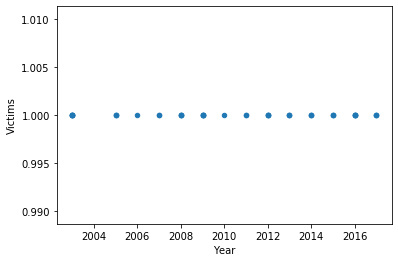

In [45]:
df_sample['Year'] = df_sample['Year'].astype('int64')

df_sample.plot(kind='scatter',x='Year',y='Victims')

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

Text(0.5, 1.0, 'Frequency of AutonomousCommunity')

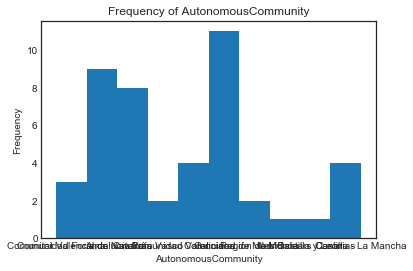

In [53]:
plt.hist(df_sample['AutonomousCommunity'])
plt.xlabel('AutonomousCommunity')
plt.ylabel('Frequency')
plt.title('Frequency of AutonomousCommunity')